In [36]:
from data_preprocessing_functions import *

In [37]:
# Load the data
filename = "Test_data.csv"
raw_df = load_data(filename)
raw_df.to_csv('raw_df.csv')


Generate data summary

In [38]:
generate_data_summary(raw_df)

                 ts1            ts2
count  201517.000000  936488.000000
mean       95.172272       0.927215
std         1.282164       0.119920
min        91.512942       0.601150
25%        95.106221       0.871450
50%        95.462056       0.945000
75%        96.042938       1.027800
max        96.852863       1.108050


Inspect the data set

In [39]:
# Define variables to represent each time series 
ts1 = raw_df['ts1']
ts2 = raw_df['ts2']

In [40]:
# Analyze missing values and missing ranges
analyze_missing_values(ts1, "ts1")
analyze_missing_values(ts2, "ts2")

Missing values in ts1: 1113924
Max missing range in ts1: 3579
Max missing range in ts1: 4.97 days
Missing values in ts2: 378953
Max missing range in ts2: 2139
Max missing range in ts2: 2.97 days


In [41]:
# Analyze time gaps
analyze_time_gaps(raw_df)

Time gaps:

count            1315440
mean     0 days 00:02:00
std      0 days 00:00:00
min      0 days 00:02:00
25%      0 days 00:02:00
50%      0 days 00:02:00
75%      0 days 00:02:00
max      0 days 00:02:00
Name: datetime, dtype: object


In [42]:
# Count days of week frequency for days that contain data points
print("Day of week frequency ts_1:")
day_counts_ts1 = count_days_frequency_resampled(ts1)
print(day_counts_ts1)

print("\n")

print("Day of week frequency ts_2:")
day_counts_ts2 = count_days_frequency_resampled(ts2)
print(day_counts_ts2)

Day of week frequency ts_1:
Monday       258
Tuesday      259
Wednesday    261
Thursday     260
Friday       253
Sunday       243
Name: datetime, dtype: int64


Day of week frequency ts_2:
Monday       261
Tuesday      262
Wednesday    261
Thursday     261
Friday       260
Sunday       259
Name: datetime, dtype: int64


In [43]:
# Plot the histogram of missing value streaks for ts1 and ts2
plot_streak_histogram(ts1, 'ts1')
plot_streak_histogram(ts2, 'ts2')

In [44]:
# Analyze time gaps for non-smoothed data
time_gaps_1 = calculate_time_gaps(ts1)
print("Time gaps for ts1:")
print(time_gaps_stats(time_gaps_1))

print("\n")
print("Time gaps for ts2:")
time_gaps_2 = calculate_time_gaps(ts2)
print(time_gaps_stats(time_gaps_2))

Time gaps for ts1:
count                       104817
mean     0 days 00:21:15.278628466
std      0 days 02:48:02.808824503
min                0 days 00:02:00
25%                0 days 00:02:00
50%                0 days 00:04:00
75%                0 days 00:12:00
max                4 days 23:18:00
Name: ts1, dtype: object


Time gaps for ts2:
count                         2271
mean     0 days 05:33:43.936591809
std      0 days 15:11:44.853764336
min                0 days 00:02:00
25%                0 days 00:02:00
50%                0 days 00:02:00
75%                0 days 00:04:00
max                2 days 23:18:00
Name: ts2, dtype: object


Exclude saturdays and inspect the data again

In [45]:
# Define variables to represent each time series 
raw_df_ns = raw_df.copy()
raw_df_ns = raw_df_ns[raw_df_ns.index.dayofweek != 5]  # 5 represents Saturday
ts1 = raw_df_ns['ts1']
ts2 = raw_df_ns['ts2']

In [46]:
# Analyze missing values and missing ranges
analyze_missing_values(ts1, "ts1")
analyze_missing_values(ts2, "ts2")

Missing values in ts1: 926004
Max missing range in ts1: 2859
Max missing range in ts1: 3.97 days
Missing values in ts2: 191033
Max missing range in ts2: 1419
Max missing range in ts2: 1.97 days


In [47]:
# Analyze time gaps
analyze_time_gaps(raw_df_ns)

Time gaps:

count                      1127520
mean               0 days 00:02:20
std      0 days 00:21:54.382566916
min                0 days 00:02:00
25%                0 days 00:02:00
50%                0 days 00:02:00
75%                0 days 00:02:00
max                1 days 00:02:00
Name: datetime, dtype: object


In [48]:
# Count days frequency
print("Day of week frequency ts_1:")
day_counts_ts1 = count_days_frequency_resampled(ts1)
print(day_counts_ts1)

print("\n")

print("Day of week frequency ts_2:")
day_counts_ts2 = count_days_frequency_resampled(ts2)
print(day_counts_ts2)

Day of week frequency ts_1:
Monday       258
Tuesday      259
Wednesday    261
Thursday     260
Friday       253
Sunday       243
Name: datetime, dtype: int64


Day of week frequency ts_2:
Monday       261
Tuesday      262
Wednesday    261
Thursday     261
Friday       260
Sunday       259
Name: datetime, dtype: int64


In [49]:
# Plot the histogram of missing value streaks for ts1_ns and ts2_ns
plot_streak_histogram(ts1, 'ts1_ns')
plot_streak_histogram(ts2, 'ts2_ns')

In [50]:
# Analyze time gaps for non-smoothed data
time_gaps_1 = calculate_time_gaps(ts1)
print("Time gaps for ts1:")
print(time_gaps_stats(time_gaps_1))

print("\n")
print("Time gaps for ts2:")
time_gaps_2 = calculate_time_gaps(ts2)
print(time_gaps_stats(time_gaps_2))

Time gaps for ts1:
count                       104817
mean     0 days 00:17:40.137954721
std      0 days 01:41:08.116355295
min                0 days 00:02:00
25%                0 days 00:02:00
50%                0 days 00:04:00
75%                0 days 00:12:00
max                3 days 23:18:00
Name: ts1, dtype: object


Time gaps for ts2:
count                         2271
mean     0 days 02:48:14.214002642
std      0 days 07:33:30.525745624
min                0 days 00:02:00
25%                0 days 00:02:00
50%                0 days 00:02:00
75%                0 days 00:04:00
max                1 days 23:18:00
Name: ts2, dtype: object


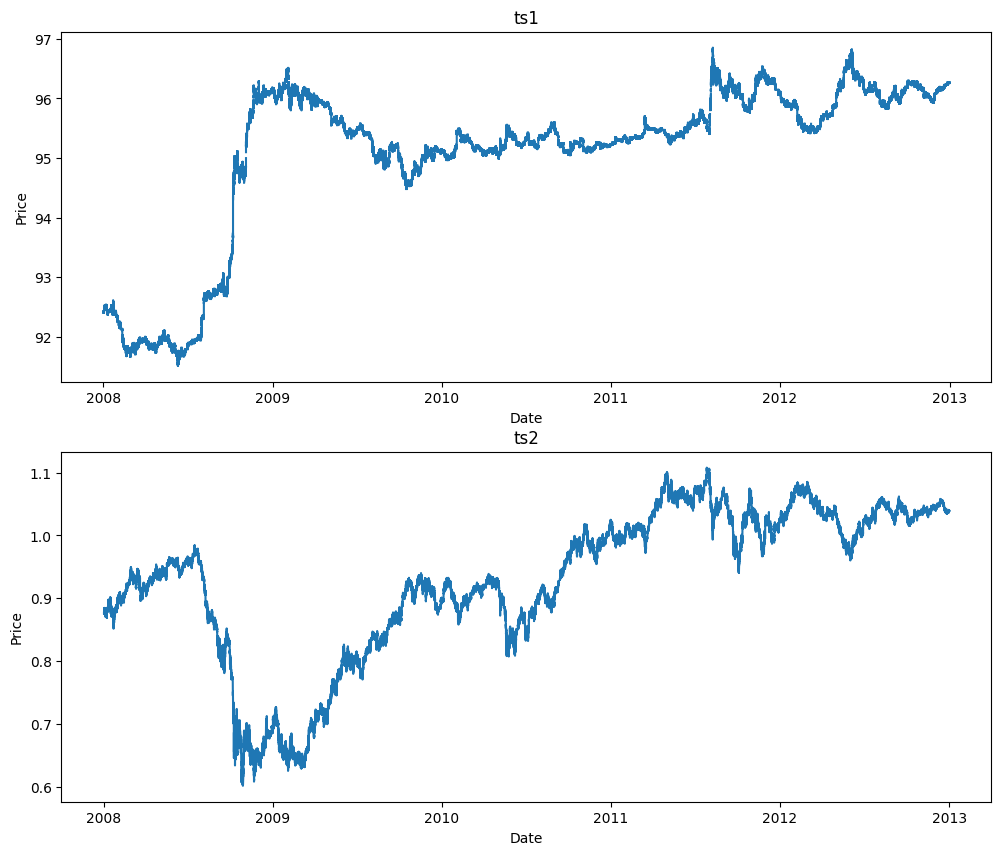

In [51]:
ts1_label="ts1"
ts2_label="ts2"

# Extract time series from the raw DataFrame
ts1 = raw_df[ts1_label]
ts2 = raw_df[ts2_label]
# Plot the original time series
plot_time_series(ts1, ts2, ts1_label, ts2_label)

Impute missing values given original data. There are three options for imputation; interpolation, mean and median. A heuristic is applied which adjusts the window size for imputation depending on whether a continuous sequence of missing data points is greater than or less than 4 hours. Short gap threshold = 4hrs, long gap threshold = 4 days.

Imputation: Interpolation

Missing values in imputed ts1: 0
Missing values in imputed ts2: 0
Max missing range in imputed ts1: 0
Max missing range in imputed ts2: 0


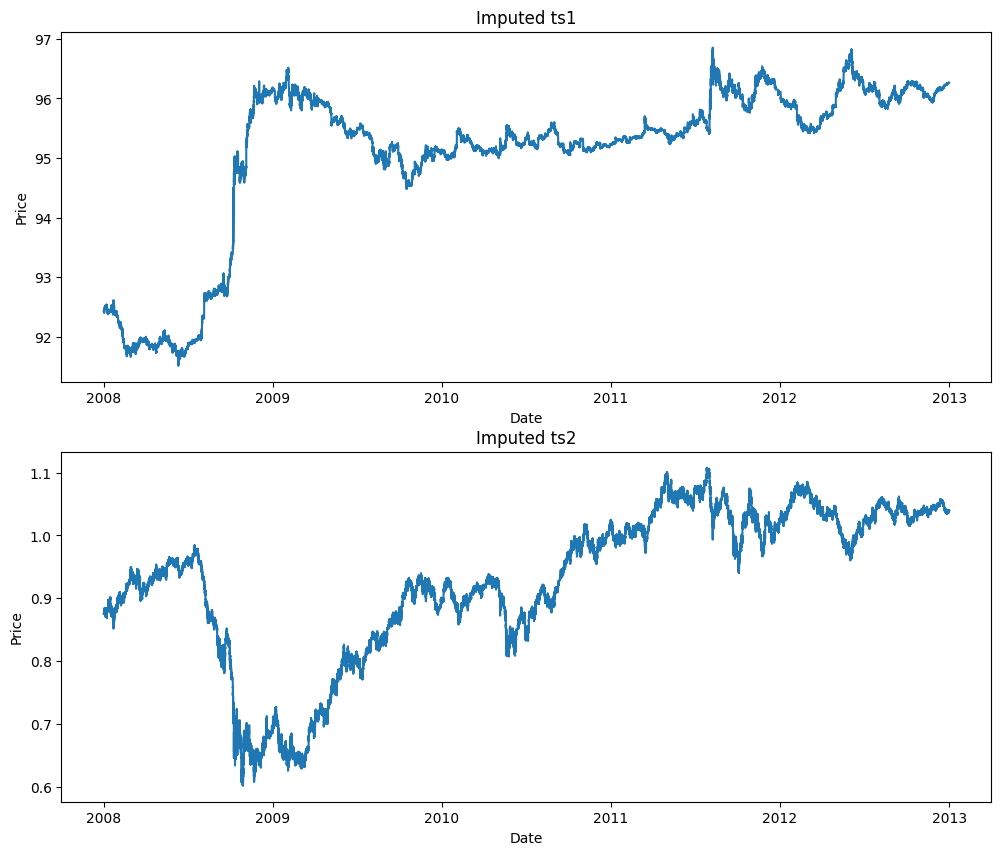

In [52]:
# Calculate maximum missing ranges for each time series
max_ts1 = max_missing_range(ts1)
max_ts2 = max_missing_range(ts2)
method = "interpolate"
# Impute missing values in ts1 and ts2 using linear interpolation
imputed_ts1 = impute_missing_values_lin(ts1)
imputed_ts2 = impute_missing_values_lin(ts2)

# Print the number of missing values in the imputed series
print(f"Missing values in imputed {ts1_label}: {imputed_ts1.isna().sum()}")
print(f"Missing values in imputed {ts2_label}: {imputed_ts2.isna().sum()}")

# Calculate the maximum missing range in the imputed series
max_imputed_ts1 = max_missing_range(imputed_ts1)
max_imputed_ts2 = max_missing_range(imputed_ts2)

# Print the maximum missing range in the imputed series
print(f"Max missing range in imputed {ts1_label}: {max_imputed_ts1}")
print(f"Max missing range in imputed {ts2_label}: {max_imputed_ts2}")

# Plot the imputed time series
plot_time_series(
    imputed_ts1, imputed_ts2, f"Imputed {ts1_label}", f"Imputed {ts2_label}"
)
clean_df = pd.concat([imputed_ts1, imputed_ts2], axis=1)
clean_df.to_csv(f'{method}_imputed_df.csv')

Imputation: Median

In [53]:
method = "median"
# Impute missing values in ts1 and ts2 using linear interpolation
imputed_ts1 = impute_missing_values_median(ts1)
imputed_ts2 = impute_missing_values_median(ts2)

# Print the number of missing values in the imputed series
print(f"Missing values in imputed {ts1_label}: {imputed_ts1.isna().sum()}")
print(f"Missing values in imputed {ts2_label}: {imputed_ts2.isna().sum()}")

# Calculate the maximum missing range in the imputed series
max_imputed_ts1 = max_missing_range(imputed_ts1)
max_imputed_ts2 = max_missing_range(imputed_ts2)

# Print the maximum missing range in the imputed series
print(f"Max missing range in imputed {ts1_label}: {max_imputed_ts1}")
print(f"Max missing range in imputed {ts2_label}: {max_imputed_ts2}")

# Plot the imputed time series
plot_time_series(
    imputed_ts1, imputed_ts2, f"Imputed {ts1_label}", f"Imputed {ts2_label}"
)
clean_df = pd.concat([imputed_ts1, imputed_ts2], axis=1)
clean_df.to_csv(f'{method}_imputed_df.csv')

KeyboardInterrupt: 

Imputation: Mean

In [ ]:
method = "mean"
# Impute missing values in ts1 and ts2 using linear interpolation
imputed_ts1 = impute_missing_values_mean(ts1)
imputed_ts2 = impute_missing_values_mean(ts2)

# Print the number of missing values in the imputed series
print(f"Missing values in imputed {ts1_label}: {imputed_ts1.isna().sum()}")
print(f"Missing values in imputed {ts2_label}: {imputed_ts2.isna().sum()}")

# Calculate the maximum missing range in the imputed series
max_imputed_ts1 = max_missing_range(imputed_ts1)
max_imputed_ts2 = max_missing_range(imputed_ts2)

# Print the maximum missing range in the imputed series
print(f"Max missing range in imputed {ts1_label}: {max_imputed_ts1}")
print(f"Max missing range in imputed {ts2_label}: {max_imputed_ts2}")

# Plot the imputed time series
plot_time_series(
    imputed_ts1, imputed_ts2, f"Imputed {ts1_label}", f"Imputed {ts2_label}"
)
clean_df = pd.concat([imputed_ts1, imputed_ts2], axis=1)
clean_df.to_csv(f'{method}_imputed_df.csv')